In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error, mean_absolute_error
import random
import ssl

**1. Загрузить файл hr.csv (можно найти во сложении к заданию)**

In [2]:
data = pd.read_csv('HR.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


**2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)**

In [26]:
# Проверяем нет ли пустых ячеек
for cell in data.head(0):
    print(data[data[cell].isnull()])

Empty DataFrame
Columns: [satisfaction_level, last_evaluation, number_project, average_montly_hours, time_spend_company, Work_accident, left, promotion_last_5years, sales, salary]
Index: []
Empty DataFrame
Columns: [satisfaction_level, last_evaluation, number_project, average_montly_hours, time_spend_company, Work_accident, left, promotion_last_5years, sales, salary]
Index: []
Empty DataFrame
Columns: [satisfaction_level, last_evaluation, number_project, average_montly_hours, time_spend_company, Work_accident, left, promotion_last_5years, sales, salary]
Index: []
Empty DataFrame
Columns: [satisfaction_level, last_evaluation, number_project, average_montly_hours, time_spend_company, Work_accident, left, promotion_last_5years, sales, salary]
Index: []
Empty DataFrame
Columns: [satisfaction_level, last_evaluation, number_project, average_montly_hours, time_spend_company, Work_accident, left, promotion_last_5years, sales, salary]
Index: []
Empty DataFrame
Columns: [satisfaction_level, last

Строк с незаполненными столбцами - нет

In [55]:
# Считаем основные показатели
for cell in data.head(0):
    print('Для столбца - ', cell)
    print('Медиана: ', statistics.median(data[cell]))
    print('Значение минимум: ' , min(data[cell]))
    print('Значение максимум: ' , max(data[cell]))
    try:
        print('Значение моды: ', statistics.mode(data[cell]))
    except:
        print('Значение моды:  - !!!! ошибка расчета')
    if type(data[cell][0]) == str:
        print('Не существует для нечисловых данных мат ожидания и стандартного отклонения')
    else:
        print('Значение мат ожидания: ', statistics.mean(data[cell]))
        print('Значение стандартного отклонения: ' , statistics.pstdev(data[cell]))

Для столбца -  satisfaction_level
Медиана:  0.64
Значение минимум:  0.09
Значение максимум:  1.0
Значение моды:  0.1
Значение мат ожидания:  0.6128335222348157
Значение стандартного отклонения:  0.2486223626820733
Для столбца -  last_evaluation
Медиана:  0.72
Значение минимум:  0.36
Значение максимум:  1.0
Значение моды:  0.55
Значение мат ожидания:  0.7161017401160077
Значение стандартного отклонения:  0.1711634045107436
Для столбца -  number_project
Медиана:  4
Значение минимум:  2
Значение максимум:  7
Значение моды:  4
Значение мат ожидания:  3.80305353690246
Значение стандартного отклонения:  1.2325512654823438
Для столбца -  average_montly_hours
Медиана:  200
Значение минимум:  96
Значение максимум:  310
Значение моды:  - !!!! ошибка расчета
Значение мат ожидания:  201.0503366891126
Значение стандартного отклонения:  49.94143446256218
Для столбца -  time_spend_company
Медиана:  3
Значение минимум:  2
Значение максимум:  10
Значение моды:  3
Значение мат ожидания:  3.4982332155477

**3. Рассчитать и визуализировать корреляционную матрицу для переменных**

In [3]:
 data.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


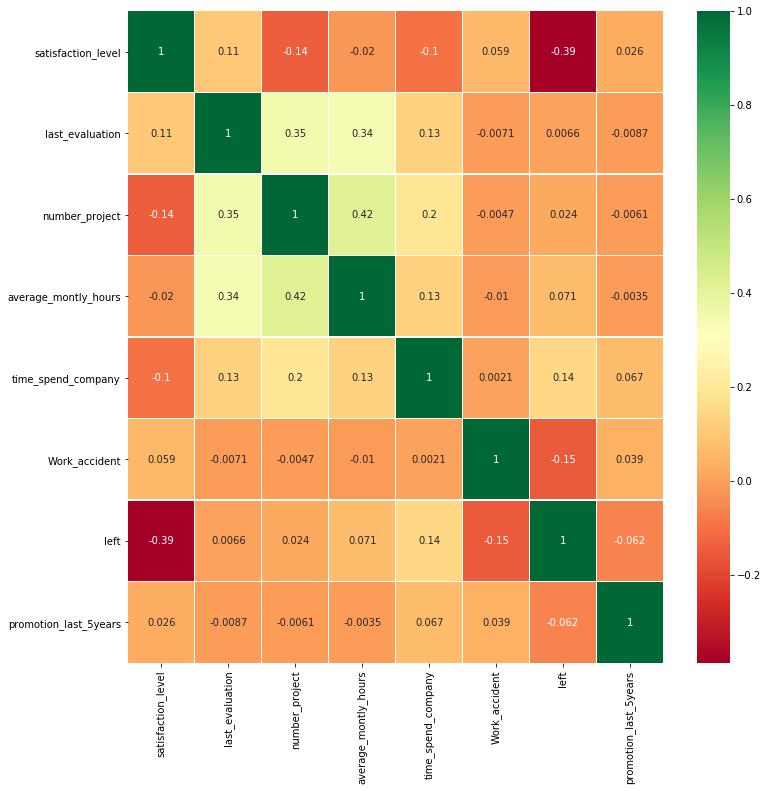

In [4]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Корреляция между признаками последняя оценка, номер проекта, среднее часы работы в месяц. Много проектов занимают много времени, а такие сотрудники получают лучшие оценки.
Обратная корреляция - менее довольные сотрудники - чаще уходят.

**4. Визуализировать несколько взаимосвязей между переменными**

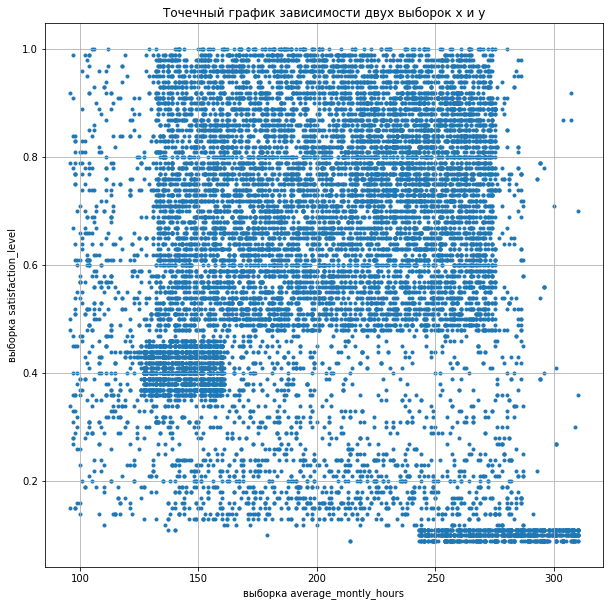

In [7]:
average_montly_hours = data['average_montly_hours']
satisfaction_level = data['satisfaction_level']
plt.figure(figsize=(10,10))
plt.xlabel('выборка average_montly_hours')
plt.ylabel('выборка satisfaction_level')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(average_montly_hours, satisfaction_level, marker='.')

Text(0, 0.5, 'Уровень удовлетворенности')

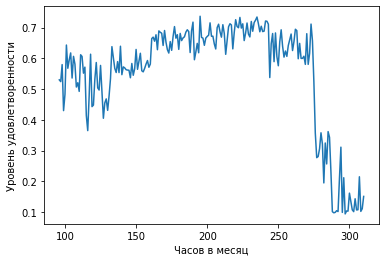

In [6]:
data_AMH = data.groupby('average_montly_hours').mean()['satisfaction_level']
data_AMH.plot()
plt.xlabel('Часов в месяц', fontsize=10)
plt.ylabel('Уровень удовлетворенности', fontsize=10)

Люди работающие много - имеют низкий уровень удовлетворенности. При низкой нагрузке также возникает недовольство. Сотрудники с средней нагрузкой - довольны с большей вероятностью.

Text(0, 0.5, 'Последняя оценка')

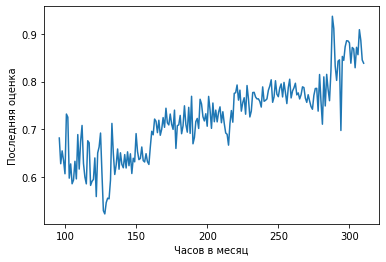

In [7]:
data_AMH = data.groupby('average_montly_hours').mean()['last_evaluation']
data_AMH.plot()
plt.xlabel('Часов в месяц', fontsize=10)
plt.ylabel('Последняя оценка', fontsize=10)

Чем больше работаешь - тем лучше оценка

Text(0, 0.5, 'Последняя оценка')

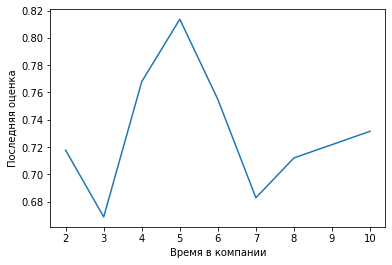

In [8]:
data_AMH = data.groupby('time_spend_company').mean()['last_evaluation']
data_AMH.plot()
plt.xlabel('Время в компании', fontsize=10)
plt.ylabel('Последняя оценка', fontsize=10)

Сотрудники на 2-3 год получают оценки хуже, далее становятся лучше (набираются опыта), но со временем снова становятся менее ценным - по всей видимости выгорают. Пик продуктивности на 5 год.

**5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными**

  * Гипотеза:  решение об увольнении - не зависит от времени, проведенного в компании. Выборка уволившихся и выборка оставшихся - одинакова по параметру стаж.

In [18]:
stats.ttest_1samp(data[data['left'] == 1]['time_spend_company'], data[data['left'] == 0]['time_spend_company'].mean())

Ttest_1sampResult(statistic=30.344952648144773, pvalue=3.8135536324917118e-180)

Отвергаем нулевую гипотезу и говорим, что решение об увольнение зависит от стажа работы. 

  * Гипотеза:  решение об увольнении - не зависит от времени работы в месяц . Выборка уволившихся и выборка оставшихся - одинакова по данному параметру  .

In [20]:
stats.ttest_1samp(data[data['left'] == 1]['average_montly_hours'], data[data['left'] == 0]['average_montly_hours'].mean())

Ttest_1sampResult(statistic=8.16165358736514, pvalue=4.533263401349849e-16)

Решение об увольнение зависит от времени работы в месяц

In [19]:
stats.ttest_1samp(data[data['salary'] == 'low']['average_montly_hours'], data[data['salary'] == 'high']['average_montly_hours'].mean() )

Ttest_1sampResult(statistic=1.9000014887219232, pvalue=0.05747220990636135)

In [21]:
stats.ttest_1samp(data[data['salary'] == 'medium']['average_montly_hours'], data[data['salary'] == 'high']['average_montly_hours'].mean()  )

Ttest_1sampResult(statistic=2.3933191382505745, pvalue=0.016725145981511577)

In [24]:
stats.ttest_1samp(data[data['salary'] == 'low']['average_montly_hours'], data[data['salary'] == 'medium']['average_montly_hours'] .mean())

Ttest_1sampResult(statistic=-0.5750787924242552, pvalue=0.5652556971164762)

Время работы в месяц зависит от уровня заработной платы

**6. Рассчитать сколько работников работает в каждом департаменте**

In [27]:
data[data['left']==0]['sales'].value_counts()

sales          3126
technical      2023
support        1674
IT              954
product_mng     704
RandD           666
marketing       655
accounting      563
management      539
hr              524
Name: sales, dtype: int64

Больше всего сотрудников в отделе продаж, ИТ и поддержке, меньше всего в HR и менеджменте

**7. Показать распределение сотрудников по зарплатам**

In [43]:
data['salary'].replace(['low'], 1, regex=True, inplace=True)
data['salary'].replace(['medium'], 2, regex=True, inplace=True)
data['salary'].replace(['high'], 3, regex=True, inplace=True)

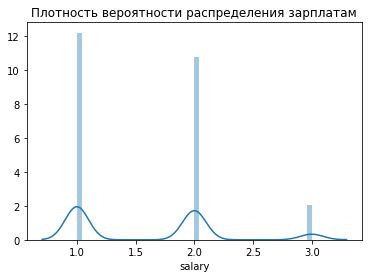

In [46]:
sns.distplot(data['salary'], 50)
plt.title('Плотность вероятности распределения зарплатам')
plt.show()

 Высокую зарплату получает меньшая доля сотрудников 

**8. Показать распределение сотрудников по зарплатам совместно с департаментами**

In [47]:
sales = data[data['sales']=='sales']['salary']
technical = data[data['sales']=='technical']['salary']
support = data[data['sales']=='support']['salary']
IT = data[data['sales']=='IT']['salary']
product_mng= data[data['sales']=='product_mng']['salary']
marketing  = data[data['sales']=='marketing']['salary']
RandD   = data[data['sales']=='RandD']['salary']
accounting  = data[data['sales']=='accounting']['salary']
hr  = data[data['sales']=='hr']['salary']
management  = data[data['sales']=='management']['salary']

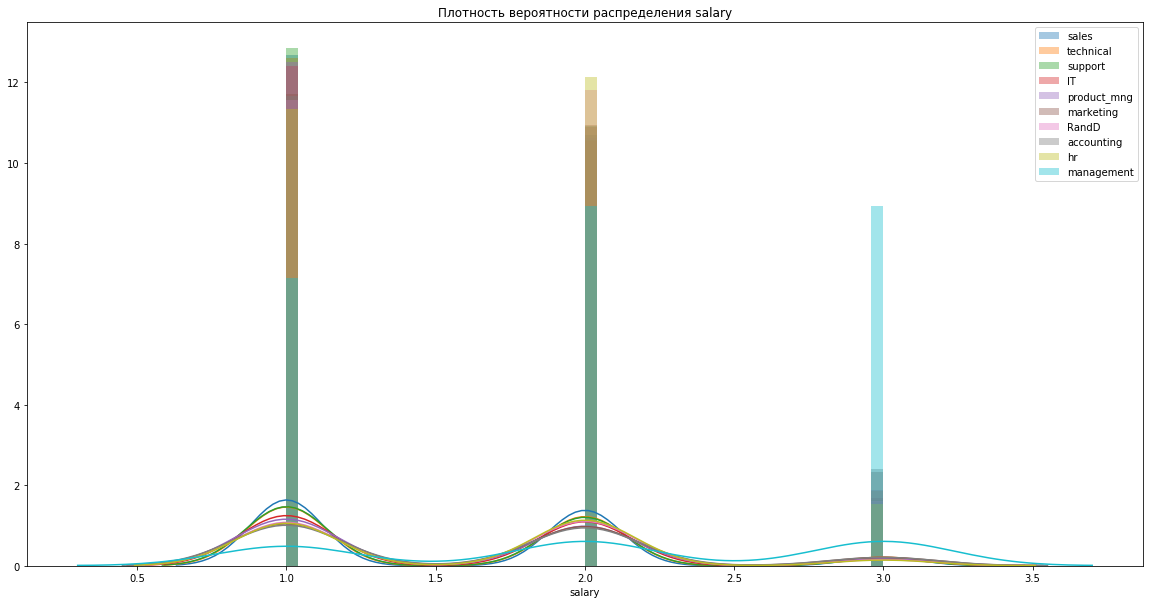

In [53]:
plt.figure(figsize=(20,10))
sns.distplot(sales, 50)
sns.distplot(technical, 50)
sns.distplot(support, 50)
sns.distplot(IT, 50)
sns.distplot(product_mng, 50)
sns.distplot(marketing, 50)
sns.distplot(RandD, 50)
sns.distplot(accounting, 50)
sns.distplot(hr, 50)
sns.distplot(management, 50)
plt.title('Плотность вероятности распределения salary')
plt.legend(['sales', 'technical','support','IT','product_mng','marketing','RandD','accounting','hr','management'])
plt.show()

Доля сотрудиков с высокими зарплатами среди менеджеров больше. В продажах и поддержке больше средних и небольших зарплат.

**9. Сколько сотрудников покинули компанию**

In [28]:
data['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

Покинуло - 3571

**10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию**

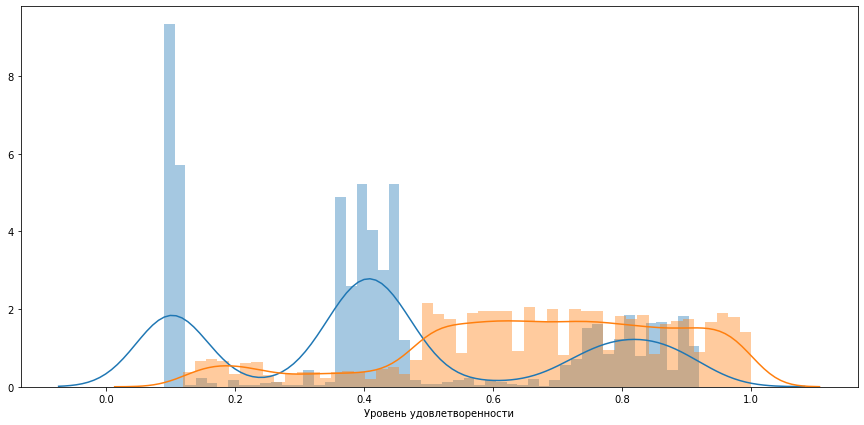

In [38]:
plt.figure(figsize=(15,7))
sns.distplot(data[data['left'] == 1]['satisfaction_level'], 50)
sns.distplot(data[data['left'] == 0]['satisfaction_level'], 50)
plt.xlabel('Уровень удовлетворенности')
plt.show()

Чем ниже показатель удовлетворенности, тем больше вероятность того, что cотрудник уволится

   * Гипотеза: отсутствие повышения не влияет на увольнеие

In [45]:
stats.ttest_ind(data[data['left'] == 1]['promotion_last_5years'], data[data['left'] == 0]['promotion_last_5years'])

Ttest_indResult(statistic=-7.581195349367637, pvalue=3.624047224146943e-14)

Ответ: нет - влияет

 * Гипотеза: отсутствие несчастных случаев не влияет на увольнение

In [48]:
stats.ttest_ind(data[data['left'] == 1]['Work_accident'], data[data['left'] == 0]['Work_accident'])

Ttest_indResult(statistic=-19.165804033090176, pvalue=6.613049400453939e-81)

Ответ: нет - влияет